### This notebook contains our Diabetes dataset quick exploration and our model diagnosis

The goal is to deploy a Logistic Regression model that can predict whether or not a person would have Diabetes given certain medical parameters, such as amount of pregnancies, level of glucose, blood pressure, skin thickness, insulin levels, BMI and age of the person.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('Healthcare-Diabetes.csv', index_col = 'Id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2768 entries, 1 to 2768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 216.2 KB


In [18]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,,,,,,,,,
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [19]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


We are eliminating the Diabetes Pedigree Function column, as it is another predictor model.

In [ ]:
df = df.drop('DiabetesPedigreeFunction', axis = 1)

Let's check how balanced our dependent variabe is:

<Axes: xlabel='Outcome', ylabel='count'>

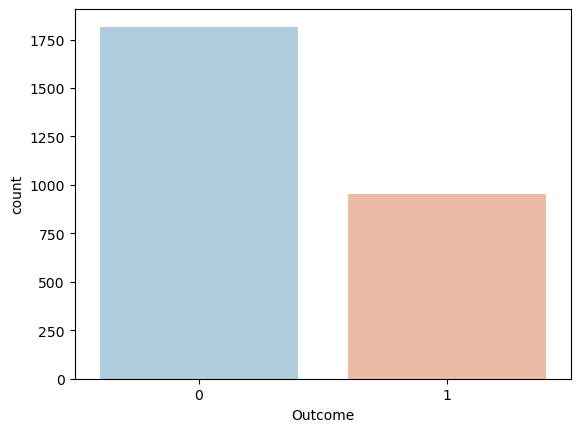

In [46]:
sns.countplot(x='Outcome', data=df, palette='RdBu_r')

The data seems to be clean. We have no null values and a suffcient sampe size.

### Training and Predicting

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Outcome',axis=1), 
                                                    df['Outcome'], test_size=0.30, 
                                                    random_state=101)

In [49]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

In [51]:
predictions = logmodel.predict(x_test)

### Diagnosis

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       541
           1       0.72      0.60      0.66       290

    accuracy                           0.78       831
   macro avg       0.76      0.74      0.75       831
weighted avg       0.78      0.78      0.77       831



Finally, we are going to save our model

In [31]:
import pickle

In [54]:
pickle.dump(logmodel, open('model.pkl','wb'))

**Note: No in-depth EDA was performed as that was not the purpose of this project. Instead, a model was built and deployed using Flask.*